## 데이터 및 라이브러리 로딩

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd

%matplotlib inline
mpl.rcParams['axes.unicode_minus'] = False
train = pd.read_csv('C:\\Users\\user\\workspace\\movie\\movies_train.csv')
test = pd.read_csv('C:\\Users\\user\\workspace\\movie\movies_test.csv')
submission = pd.read_csv('C:\\Users\\user\\workspace\\movie\\submission.csv')

In [72]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

버전:  3.4.3
설치 위치:  C:\Users\user\anaconda3\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\user\.matplotlib
캐시 위치:  C:\Users\user\.matplotlib


## 데이터탐색

In [73]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [74]:
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [76]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [77]:
for col in train.columns: #범주형 데이터가 가지고 있는 feature
    if train[col].dtype == 'object':
        categories = train[col].unique()
        print(f'[{col}] ({len(categories)})')
        print('\n'.join(categories))
        print()

[title] (600)
개들의 전쟁
내부자들
은밀하게 위대하게
나는 공무원이다
불량남녀
강철대오 : 구국의 철가방
길위에서
회사원
1789, 바스티유의 연인들
청춘그루브
AV 아이돌
무서운 집
해로
짓
철가방 우수氏
자유의 언덕
써니
별이 빛나는 밤
카트
하하하
두근두근 내 인생
성실한 나라의 앨리스
원령
관능의 법칙
안녕, 투이
영도
이웃집 좀비
러브앤서울 복숭아마을 도색소동기
무법자
일탈여행 : 프라이빗 아일랜드
로맨틱 헤븐
겨울나비
다이노 타임
물 없는 바다
오싹한 연애
마이 페어 웨딩
원나잇 온리
일대일
하늘의 황금마차
러브픽션
불타는 내 마음
끝과 시작
7월 32일
청춘학당 : 풍기문란 보쌈 야사
부당거래
콘돌은 날아간다
페어 러브
극적인 하룻밤
빅매치
극장판 뛰뛰빵빵 구조대 미션: 둥둥이를 구하라!
황구
워킹걸
나의 선택 - 잊혀진 가방 그 못다한 이야기
에스엠타운 더 스테이지
미조
원더풀 라디오
막걸스
미궁: 비밀애
파괴된 사나이
친구 2
              개를 훔치는 완벽한 방법
청춘정담
이방인들
간첩
그 참을 수 없는 맛
도리화가
의뢰인
열정같은소리하고있네
화끈한 써비스: 어느 잔인한 미용사의
세상끝의 사랑
어디로 갈까요?
완전 소중한 사랑
사물의 비밀
청포도 사탕: 17년 전의 약속
아저씨
원 오브 어 카인드 3D
사랑이 무서워
검은손
덕수리 5형제
별일아니다
바비
심야의 FM
만추
레인보우
더 파이브
두 개의 선
반창꼬
먹이사슬
야누스: 욕망의 두 얼굴
거짓말
인간중독
무적자
두 번의 결혼식과 한 번의 장례식
화창한 그날들
렛 미 아웃
경복
잉투기
사이비
두 개의 달
신이 보낸 사람
26년
관상
비념
퇴마: 무녀굴
풍산개
맨홀
봄
미국의 바람과 불
레드마리아
카페 서울
차형사
여행
범죄와의 전쟁: 나쁜놈들 전성시대
열여덟, 열아홉
무명인
북촌방향
오늘의 연애
그 사람 그 사랑 그 세상
라스트 갓파더
소녀괴담
미스진은 예쁘다
개똥이
변호인
아빠를 빌려드립니다
역린
하쿠나 마타타 - 지라니 이야기
울지마, 톤즈
심장이 뛰네
조선명탐정 

In [78]:
for col in train.columns: #범주형 데이터 분포 확인
    if train[col].dtype == 'object':
        categories = train[col].unique()
        print(f'[{col}] ({len(categories)})')

[title] (600)
[distributor] (169)
[genre] (12)
[release_time] (330)
[screening_rat] (4)
[director] (472)


In [79]:
train['box_off_num'].unique()

array([   23398,  7072501,  6959083,   217866,   483387,   233211,
          53526,  1110523,     4778,      868,      745,     1079,
           5851,    23052,    92404,    39317,  7453715,     5693,
         814570,    57029,  1624573,    44074,      914,   781516,
           1176,     3094,     2807,   160734,     3460,    73729,
            521,   285084,      390,  3009406,     4586,     2923,
          10142,     2703,  1726227,     9089,    38809,      742,
           3772,  2723028,     1209,    27083,   321641,  1177435,
          21939,       72,   151550,    15687,    35857,      112,
         986287,     2410,      514,  1012310,  2971475,   306642,
            484,      432,  1310895,     1697,   317505,  2393103,
         654407,      148,     4746,      488,    20303,     8757,
           1637,  6178665,     8083,   402876,    11650,   210775,
            236,     2821,  1208310,   849635,     2775,   731212,
           2296,  2475797,     2070,     4122,     5212,  1441

In [80]:
train['director'].unique()

array(['조병옥', '우민호', '장철수', '구자홍', '신근호', '육상효', '이창재', '임상윤', '정성복',
       '변성현', '조조 히데오', '양병간', '최종태', '한종훈', '윤학렬', '홍상수', '강형철', '린슈유',
       '부지영', '이재용', '안국진', '동지견', '권칠인', '김재한', '손승웅', '류훈', '김철한',
       '한상희', '장진', '김규민', '최윤석', '김관철', '황인호', '장희선', '김조광수', '김기덕',
       '오멸', '전계수', '최원섭', '민규동', '진승현', '도창훈', '류승완', '전수일', '신연식',
       '하기호', '최호', '방형우', '박용집', '정범식', '김상철', '배성상', '남기웅', '김기영',
       '곽경택', '김성호', '문인수', '최용석', '이지형', '이종필', '손영성', '정기훈', '김인식',
       '김진민', '이영미', '김희정', '이정범', '손석', '정우철', '박재식', '전형준', '김상석',
       '에밀리오 에스테베즈', '김상만', '김태용', '신수원', '정연식', '지민', '한동호', '손영국',
       '김동명', '김대우', '송해성', '방현준', '소재영', '최시형', '엄태화', '연상호', '김동빈',
       '김진무', '조근현', '한재림', '임흥순', '김휘', '전재홍', '신재영', '김경만', '경순',
       '타케 마사하루', '신태라', '배창호', '윤종빈', '배광수', '김성수', '박진표', '권혁만', '심형래',
       '오인천', '장희철', '김병준', '양우석', '김덕수', '이재규', '이창규', '구수환', '허은희',
       '김석윤', '고석진', '최경석', '이해준', '하마구치 류스케', '오기환', '홍재희', '조원희', '장훈',
       '정익환', '박

In [81]:
num_d = train['director'].value_counts()[train['director'].value_counts() >= 3]
num_d

홍상수       7
장률        4
신재호       4
우민호       4
노진수       4
전규환       4
전수일       3
신연식       3
박철수       3
오멸        3
김기덕       3
장진        3
권칠인       3
조성규       3
김현석       3
김조광수      3
김봉은       3
윤여창       3
정성복       3
조조 히데오    3
Name: director, dtype: int64

In [82]:
corr = train.corr()
corr

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
time,1.000000,0.264675,0.306727,0.623205,0.114153,0.441452
dir_prev_bfnum,0.264675,1.000000,0.131822,0.323521,0.083818,0.283184
dir_prev_num,0.306727,0.131822,1.000000,0.450706,0.014006,0.259674
num_staff,0.623205,0.323521,0.450706,1.000000,0.077871,0.544265
num_actor,0.114153,0.083818,0.014006,0.077871,1.000000,0.111179
box_off_num,0.441452,0.283184,0.259674,0.544265,0.111179,1.000000


In [83]:
corr['box_off_num']

time              0.441452
dir_prev_bfnum    0.283184
dir_prev_num      0.259674
num_staff         0.544265
num_actor         0.111179
box_off_num       1.000000
Name: box_off_num, dtype: float64

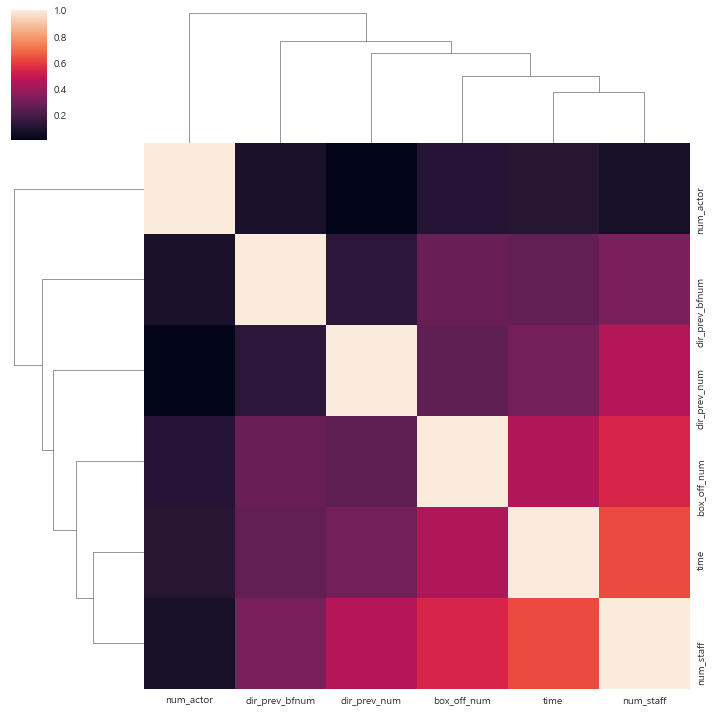

In [84]:
sns.clustermap(corr)

<AxesSubplot:>

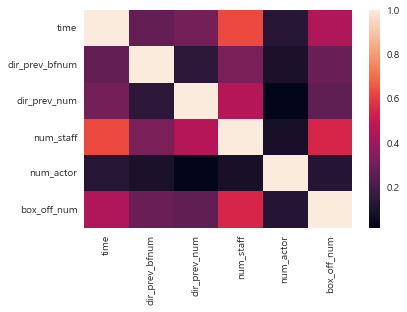

In [85]:
sns.heatmap(train.corr())

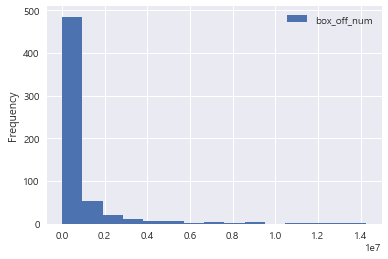

In [86]:
plt.rcParams['font.family'] = 'Malgun Gothic'
train.plot(kind='hist', y='box_off_num', bins=15)
plt.show()

<AxesSubplot:xlabel='director', ylabel='box_off_num'>

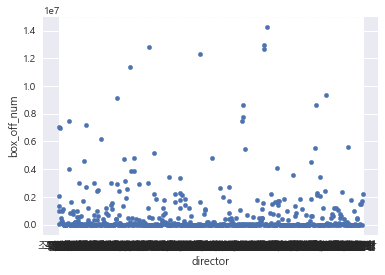

In [87]:
plt.rcParams['font.family'] = 'Malgun Gothic'
train.plot(kind='scatter', x='director', y='box_off_num')

<AxesSubplot:>

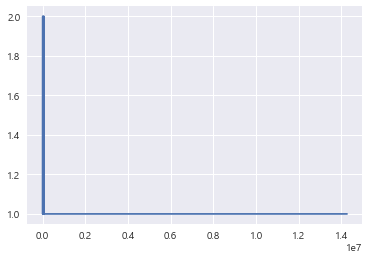

In [88]:
train['box_off_num'].value_counts().sort_index().plot()

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='box_off_num', ylabel='Density'>

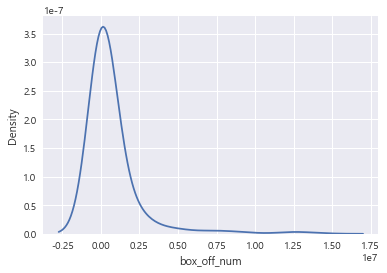

In [89]:
sns.kdeplot(train['box_off_num'], bw=0.5)

<AxesSubplot:ylabel='Frequency'>

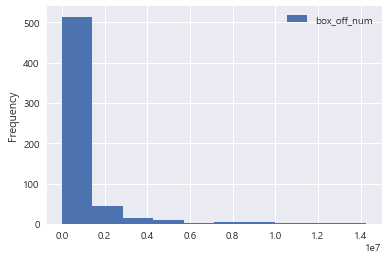

In [90]:
train.plot(kind='hist', y='box_off_num')

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='box_off_num', ylabel='Density'>

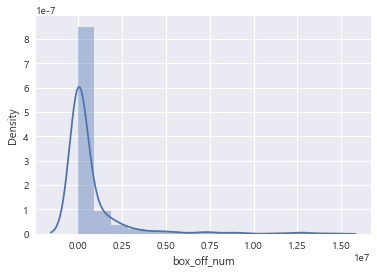

In [91]:
sns.distplot(train['box_off_num'], bins=15)

<AxesSubplot:>

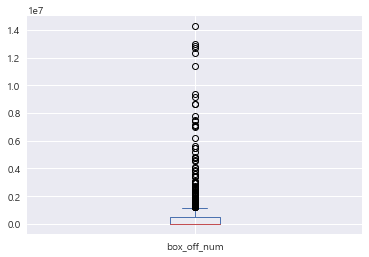

In [92]:
train.plot(kind='box', y='box_off_num')

<AxesSubplot:ylabel='box_off_num'>

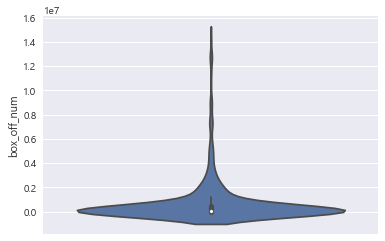

In [93]:
sns.violinplot(y=train['box_off_num'])

<AxesSubplot:xlabel='director', ylabel='box_off_num'>

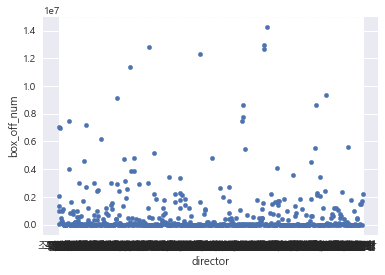

In [94]:
train.plot(kind='scatter', x='director', y='box_off_num')

<AxesSubplot:xlabel='box_off_num', ylabel='Density'>

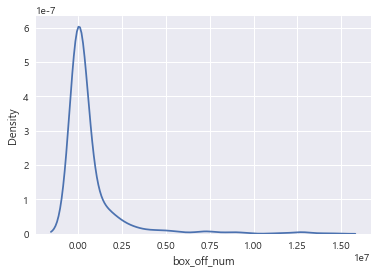

In [95]:
sns.kdeplot(train['box_off_num'])

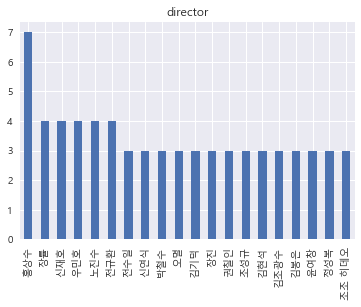

In [96]:
plt.rcParams['font.family'] = 'Malgun Gothic'
num_d.plot(kind='bar')
plt.title('director')
plt.style.use(['seaborn'])
plt.show()

In [97]:
train[train['director'] == '장철수']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083


In [98]:
train[train['director'] == '구자홍']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866


In [99]:
train[train['director'] == '홍상수']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
15,자유의 언덕,(주) 영화제작전원사,드라마,2014-09-04,67,청소년 관람불가,홍상수,NaN,0,52,3,39317
19,하하하,스폰지,드라마,2010-05-05,115,청소년 관람불가,홍상수,NaN,0,74,9,57029
115,북촌방향,(주) 영화사조제,드라마,2011-09-08,79,청소년 관람불가,홍상수,NaN,0,55,5,46212
164,지금은맞고그때는틀리다,(주)NEW,드라마,2015-09-24,121,청소년 관람불가,홍상수,39317.0,1,16,2,80734
331,다른나라에서,(주) 영화제작전원사,드라마,2012-05-31,89,청소년 관람불가,홍상수,NaN,0,70,2,31101
506,우리 선희,(주) 영화제작전원사,드라마,2013-09-12,89,청소년 관람불가,홍상수,NaN,0,8,6,69122
523,옥희의 영화,스폰지,드라마,2010-09-16,80,청소년 관람불가,홍상수,NaN,0,57,3,37122


In [100]:
train[train['director'] == '장률']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
246,풍경,인디스토리,다큐멘터리,2013-12-12,96,전체 관람가,장률,NaN,0,4,14,2178
349,필름시대사랑,(주)스마일이엔티,드라마,2015-10-22,70,15세 관람가,장률,NaN,0,94,4,1611
365,경주,인벤트 디,드라마,2014-06-12,145,15세 관람가,장률,NaN,0,85,4,63517
550,두만강,인디스토리,드라마,2011-03-17,93,15세 관람가,장률,NaN,0,22,3,2429


In [101]:
train[train['director'] == '신재호']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
179,응징자,인벤트 디,액션,2013-10-30,103,청소년 관람불가,신재호,44448.5,2,151,3,192347
367,치외법권,판씨네마(주),액션,2015-08-27,104,15세 관람가,신재호,93748.0,3,253,2,346483
563,웨딩스캔들,(주)마인스엔터테인먼트,멜로/로맨스,2012-09-06,90,15세 관람가,신재호,67602.0,1,57,2,21295
587,서유기 리턴즈,(주) 영화사조제,SF,2011-02-17,79,전체 관람가,신재호,67602.0,1,220,4,12696


In [102]:
train[train['director'] == '우민호']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501
58,파괴된 사나이,시너지,공포,2010-07-01,114,청소년 관람불가,우민호,NaN,0,290,5,1012310
63,간첩,롯데엔터테인먼트,드라마,2012-09-20,115,15세 관람가,우민호,1012310.0,1,372,5,1310895
377,내부자들: 디 오리지널,(주)쇼박스,느와르,2015-12-31,180,청소년 관람불가,우민호,3131902.0,3,382,3,2084844


In [103]:
train[train['director'] == '노진수']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
215,짓2: 붉은 낙타,드림팩트 엔터테인먼트,멜로/로맨스,2015-08-06,84,청소년 관람불가,노진수,NaN,0,44,3,808
368,친절한 가정부,BoXoo 엔터테인먼트,코미디,2015-02-26,75,청소년 관람불가,노진수,NaN,0,4,4,166
479,피해자들,골든타이드픽처스,드라마,2014-07-31,89,청소년 관람불가,노진수,NaN,0,81,2,494
594,오빠가 돌아왔다,(주)마운틴픽쳐스,코미디,2014-03-20,94,청소년 관람불가,노진수,NaN,0,37,5,1958


In [104]:
train[train['director'] == '전규환']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
284,모차르트 타운,트리필름,드라마,2011-09-15,90,청소년 관람불가,전규환,NaN,0,16,3,446
389,무게,NEW,드라마,2013-11-07,108,청소년 관람불가,전규환,NaN,0,13,2,1161
503,애니멀 타운,트리필름,드라마,2011-03-10,97,청소년 관람불가,전규환,NaN,0,1,2,1379
538,마이 보이,트리필름,드라마,2014-04-10,99,12세 관람가,전규환,NaN,0,117,4,3523


In [105]:
train[train['director'] == '전수일']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
45,콘돌은 날아간다,(주)마운틴픽쳐스,드라마,2013-05-30,102,청소년 관람불가,전수일,984.0,1,23,3,1209
392,영도다리,(주)마운틴픽쳐스,드라마,2010-07-01,81,청소년 관람불가,전수일,984.0,1,85,1,1693
411,핑크,(주)마운틴픽쳐스,드라마,2012-03-15,97,청소년 관람불가,전수일,984.0,1,49,2,971


In [106]:
train[train['director'] == '신연식']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
46,페어 러브,CJ 엔터테인먼트,드라마,2010-01-14,117,12세 관람가,신연식,NaN,0,106,2,27083
257,러시안 소설,KT&G 상상마당,드라마,2013-09-19,140,15세 관람가,신연식,NaN,0,29,2,5992
328,배우는 배우다,(주)NEW,드라마,2013-10-24,98,청소년 관람불가,신연식,NaN,0,196,2,112029


In [107]:
train[train['director'] == '박철수']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
225,생생활활,(주)팝엔터테인먼트,드라마,2013-03-21,100,청소년 관람불가,박철수,NaN,0,38,6,294
370,녹색의자 2013 - 러브 컨셉츄얼리,(주)마운틴픽쳐스,멜로/로맨스,2013-10-31,97,청소년 관람불가,박철수,NaN,0,42,2,366
501,베드,(주)마운틴픽쳐스,멜로/로맨스,2013-01-17,91,청소년 관람불가,박철수,NaN,0,37,3,660


In [108]:
train[train['director'] == '오열']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num


In [109]:
train[train['director'] == '김기덕']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
37,일대일,김기덕 필름,드라마,2014-05-22,122,청소년 관람불가,김기덕,NaN,0,135,2,10142
131,피에타,(주)NEW,드라마,2012-09-06,104,청소년 관람불가,김기덕,NaN,0,119,2,603283
571,뫼비우스,(주)NEW,드라마,2013-09-05,90,청소년 관람불가,김기덕,NaN,0,93,3,35348


In [110]:
train[train['director'] == '장진']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
30,로맨틱 헤븐,시네마서비스,드라마,2011-03-24,117,12세 관람가,장진,NaN,0,369,7,73729
273,퀴즈왕,시네마서비스,코미디,2010-09-16,121,15세 관람가,장진,NaN,0,273,13,573001
463,우리는 형제입니다,(주)쇼박스,코미디,2014-10-23,102,12세 관람가,장진,73729.0,1,357,4,970377


In [111]:
train[train['director'] == '권칠인']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
23,관능의 법칙,롯데엔터테인먼트,드라마,2014-02-13,108,청소년 관람불가,권칠인,75740.0,1,288,3,781516
55,원더풀 라디오,(주)쇼박스,드라마,2012-01-05,120,15세 관람가,권칠인,75740.0,1,279,2,986287
270,참을 수 없는,시너지,멜로/로맨스,2010-10-21,114,청소년 관람불가,권칠인,NaN,0,292,4,75740


In [112]:
train[train['director'] == '조성규']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
323,맛있는 인생,스폰지,드라마,2010-10-28,97,15세 관람가,조성규,NaN,0,66,2,900
406,내가 고백을 하면,(주)마인스엔터테인먼트,드라마,2012-11-15,100,15세 관람가,조성규,NaN,0,32,2,11969
546,설마 그럴리가 없어,(주) 영화사조제,드라마,2012-06-21,95,12세 관람가,조성규,NaN,0,23,2,1679


In [113]:
train[train['director'] == '김현석']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
297,시라노; 연애조작단,롯데엔터테인먼트,멜로/로맨스,2010-09-16,117,12세 관람가,김현석,1.158640e+06,2,342,8,2684798
360,쎄시봉,CJ 엔터테인먼트,멜로/로맨스,2015-02-05,122,15세 관람가,김현석,1.468216e+06,4,566,8,1715370
378,열한시,CJ 엔터테인먼트,공포,2013-11-28,99,15세 관람가,김현석,1.667359e+06,3,277,3,870785


In [114]:
train[train['director'] == '김조광수']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
36,원나잇 온리,(주)레인보우 팩토리,드라마,2014-07-03,67,청소년 관람불가,김조광수,NaN,0,1,5,2923
92,두 번의 결혼식과 한 번의 장례식,영화사 진진,코미디,2012-06-21,106,15세 관람가,김조광수,NaN,0,155,4,51120
528,귀,CJ 엔터테인먼트,공포,2010-06-10,109,15세 관람가,김조광수,NaN,0,255,13,13108


In [115]:
train[train['director'] == '김봉은']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
311,가자! 장미여관으로 2 - 갈증,에이블엔터테인먼트,멜로/로맨스,2014-04-10,87,청소년 관람불가,김봉은,NaN,0,27,4,3534
314,"가자, 장미여관으로",드림로드,멜로/로맨스,2014-10-08,85,청소년 관람불가,김봉은,NaN,0,26,2,1533
430,나는 야한 여자가 좋다 2,드림로드,멜로/로맨스,2014-10-01,80,청소년 관람불가,김봉은,3534.0,1,26,2,1250


In [116]:
train[train['director'] == '윤여장']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num


In [117]:
train[train['director'] == '정성복']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
355,오디세오,(주)패뷸러스,뮤지컬,2015-10-22,80,전체 관람가,정성복,NaN,0,0,0,862
508,모차르트 락 오페라,SK플래닛,뮤지컬,2011-11-17,133,전체 관람가,정성복,NaN,0,4,4,16323


In [118]:
train[train['director'] == '조조 히데오']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745
27,러브앤서울 복숭아마을 도색소동기,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745
57,미궁: 비밀애,(주) 케이알씨지,멜로/로맨스,2015-04-23,69,청소년 관람불가,조조 히데오,NaN,0,1,4,514


In [119]:
train[train['director'].str.contains('홍상수')] #홍상수가 포함된 모든 셀이 나옴

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
15,자유의 언덕,(주) 영화제작전원사,드라마,2014-09-04,67,청소년 관람불가,홍상수,NaN,0,52,3,39317
19,하하하,스폰지,드라마,2010-05-05,115,청소년 관람불가,홍상수,NaN,0,74,9,57029
115,북촌방향,(주) 영화사조제,드라마,2011-09-08,79,청소년 관람불가,홍상수,NaN,0,55,5,46212
164,지금은맞고그때는틀리다,(주)NEW,드라마,2015-09-24,121,청소년 관람불가,홍상수,39317.0,1,16,2,80734
331,다른나라에서,(주) 영화제작전원사,드라마,2012-05-31,89,청소년 관람불가,홍상수,NaN,0,70,2,31101
506,우리 선희,(주) 영화제작전원사,드라마,2013-09-12,89,청소년 관람불가,홍상수,NaN,0,8,6,69122
523,옥희의 영화,스폰지,드라마,2010-09-16,80,청소년 관람불가,홍상수,NaN,0,57,3,37122


In [120]:
train_director = train[['director']] #, 'box_off_num'
train_director.head()

,director
0,조병옥
1,우민호
2,장철수
3,구자홍
4,신근호


In [121]:
one_hot_df = pd.get_dummies(train_director)
one_hot_df

,director_New Pistol,director_강석필,director_강성옥,director_강우석,director_강의석,director_강형철,director_강효진,director_강훈,director_경순,director_계윤식,...,director_홍원찬,director_홍재희,director_홍지영,director_황동혁,director_황병국,director_황석호,director_황욱,director_황유식,director_황인호,director_황철민
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
598,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
data_dir = one_hot_df.mean()
data_dir.head()

director_New Pistol    0.001667
director_강석필           0.001667
director_강성옥           0.001667
director_강우석           0.003333
director_강의석           0.001667
dtype: float64

<AxesSubplot:ylabel='director'>

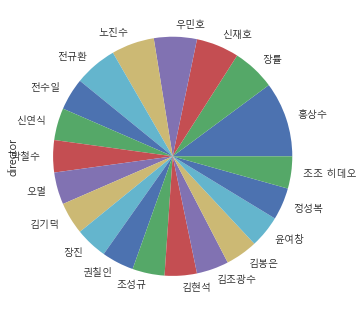

In [123]:
plt.rcParams['font.family'] = 'Malgun Gothic'
num_d.plot(kind='pie')

In [124]:
df = pd.DataFrame({
    'director' : ['조병욱', '장철수', '구자홍', '신근호']
})
df

,director
0,조병욱
1,장철수
2,구자홍
3,신근호


In [125]:
train.groupby('director').mean()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
director,,,,,,
New Pistol,88.0,NaN,0.0,48.0,8.0,2595.0
강석필,95.0,NaN,0.0,18.0,4.0,8695.0
강성옥,73.0,NaN,0.0,0.0,2.0,17912.0
강우석,158.0,844821.000000,1.5,344.0,7.0,2547448.0
강의석,62.0,NaN,0.0,3.0,2.0,152.0
...,...,...,...,...,...,...
황석호,76.0,NaN,0.0,3.0,2.0,1068.0
황욱,101.0,NaN,0.0,58.0,5.0,1504.0
황유식,93.0,506419.000000,2.0,54.0,2.0,480.0


<AxesSubplot:>

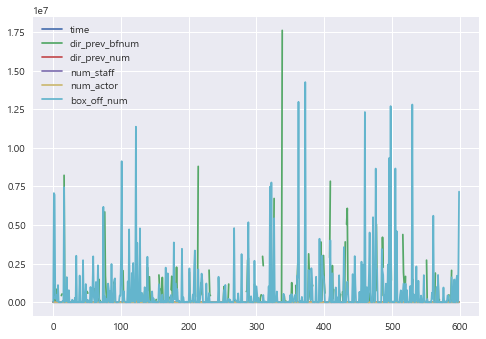

In [126]:
train.plot()

<AxesSubplot:>

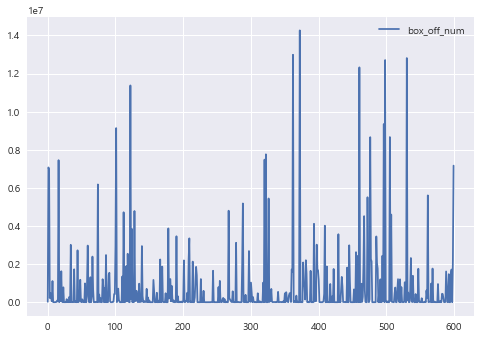

In [127]:
train.plot(y='box_off_num')

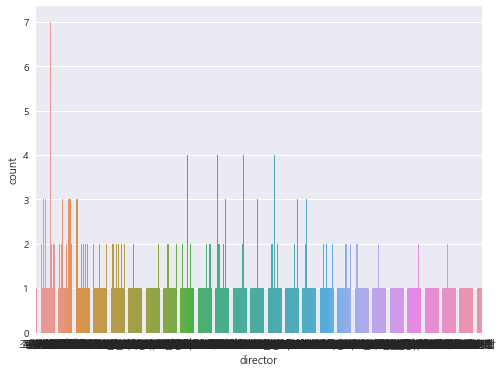

In [128]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.countplot(x='director', data=train)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show()

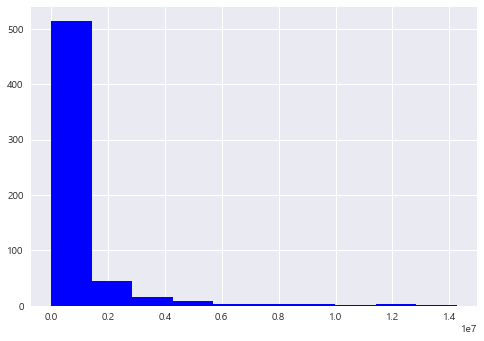

In [129]:
plt.hist(train.box_off_num, color = 'blue')
plt.show()

## 데이터 전처리

In [130]:
# 결측치가 많은 데이터 제거
train = train.drop(['dir_prev_bfnum'],axis = 1)
test =  test.drop(['dir_prev_bfnum'],axis = 1)

In [131]:
# 감독명 : 너무 다양해서 제거
train = train.drop(['director'],axis = 1)
test = test.drop(['director'],axis = 1)

In [132]:
# 제목 : 의미가 없기 때문에 제거
train = train.drop(['title'],axis= 1)
test = test.drop(['title'],axis= 1)

In [133]:
train.distributor.value_counts()

CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
                 ..
OAL(올)            1
(주)에이원 엔터테인먼트     1
(주)콘텐츠 윙          1
위더스필름             1
퍼스트런              1
Name: distributor, Length: 169, dtype: int64

In [134]:
# 상위 5개의 배급사를 제외하고 '기타'로처리
distributor_list = train.distributor.value_counts()[:5]
def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

train['distributor'] = train['distributor'].apply(lambda x : func(x))
test['distributor'] = test['distributor'].apply(lambda x : func(x))


In [135]:
# 개봉일을 바탕으로 년,월 변수 생성
train['년'] = train['release_time'].apply(lambda x: int(x[:4]))
train['월'] = train['release_time'].apply(lambda x: int(x[5:7]))
train =  train.drop(['release_time'],axis = 1)

test['년'] = test['release_time'].apply(lambda x: int(x[:4]))
test['월'] = test['release_time'].apply(lambda x: int(x[5:7]))
test =  test.drop(['release_time'],axis = 1)


In [136]:
# 원핫 인코딩
train = pd.get_dummies(train)
test = pd.get_dummies(test)

## 모델정의 및 학습

In [137]:
X_train = train.drop(['box_off_num'],axis= 1)
y_train = train['box_off_num']

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'X' is not defined

In [ ]:
model=RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)

In [ ]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

# 학습 된 모델로 예측 데이터 생성

In [ ]:
pred = model.predict(test)

## 제출파일 생성

In [ ]:
submission = pd.read_csv('/content/submission.csv')
submission

In [ ]:
submission['box_off_num'] = pred

In [ ]:
submission

In [ ]:
submission.to_csv('베이스라인.csv',index = False)